In [1]:
from google.colab import drive

In [2]:
import pandas as pd

In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [6]:
learning_rate = 1e-3
epochs = 50
batch_size = 8
dataset = "/content/drive/My Drive/XRAY/Data"


In [7]:
dicct = {}
dicct["dataset"] = dataset

In [8]:
dicct

{'dataset': '/content/drive/My Drive/XRAY/Data'}

In [9]:
import numpy as np
import cv2
iPaths = list(paths.list_images(dicct["dataset"]))

In [10]:
data = []
labels = []
for i in iPaths:
  print(i)
  label = i.split(os.path.sep)[-2]
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
  image = cv2.resize(image, (224, 224))  #Resizing the images
  data.append(image)
  labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

/content/drive/My Drive/XRAY/Data/Covid/446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg
/content/drive/My Drive/XRAY/Data/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
/content/drive/My Drive/XRAY/Data/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
/content/drive/My Drive/XRAY/Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png
/content/drive/My Drive/XRAY/Data/Covid/16660_4_1.jpg
/content/drive/My Drive/XRAY/Data/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png
/content/drive/My Drive/XRAY/Data/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
/content/drive/My Dr

In [11]:
data

array([[[[0.        , 0.00392157, 0.00784314],
         [0.        , 0.00784314, 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.78039216, 0.78039216, 0.78039216],
         [0.75686275, 0.75686275, 0.75686275],
         [0.79607843, 0.79607843, 0.79607843]],

        [[0.        , 0.        , 0.        ],
         [0.00392157, 0.02352941, 0.        ],
         [0.        , 0.01568627, 0.00392157],
         ...,
         [0.81176471, 0.81176471, 0.81176471],
         [0.80392157, 0.80392157, 0.80392157],
         [0.8       , 0.8       , 0.8       ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.85882353, 0.85882353, 0.85882353],
         [0.85882353, 0.85882353, 0.85882353],
         [0.83921569, 0.83921569, 0.83921569]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [12]:
len(labels)

200

In [13]:
import os
Data_Dir = "/content/drive/My Drive/XRAY/Data/"


In [14]:
# for i in iPaths:
#   print(i)

In [15]:
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


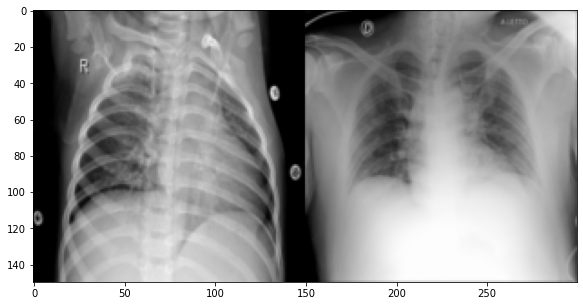

Normal Chest X-ray Vs Covid-19 Chest X-ray


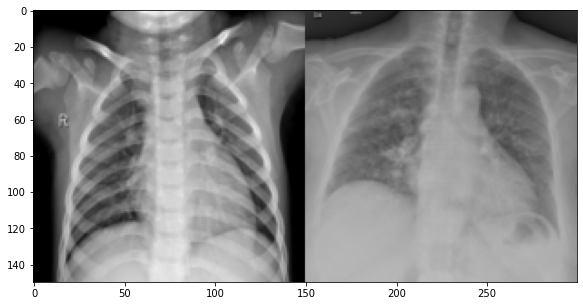

Normal Chest X-ray Vs Covid-19 Chest X-ray


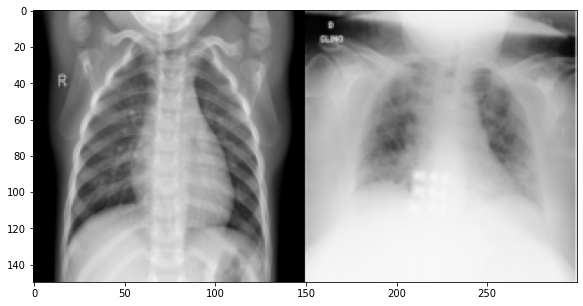

Normal Chest X-ray Vs Covid-19 Chest X-ray


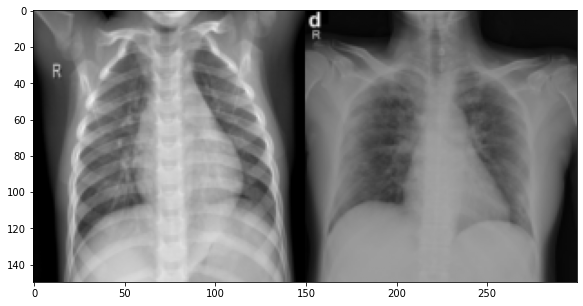

Normal Chest X-ray Vs Covid-19 Chest X-ray


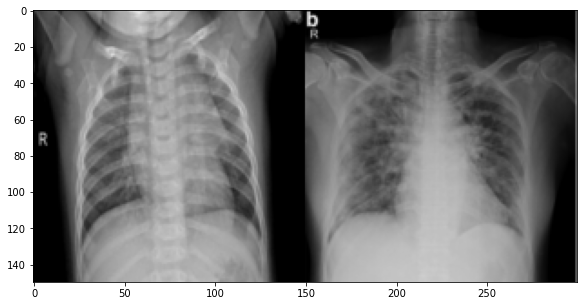

In [16]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [17]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
# print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [18]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [19]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


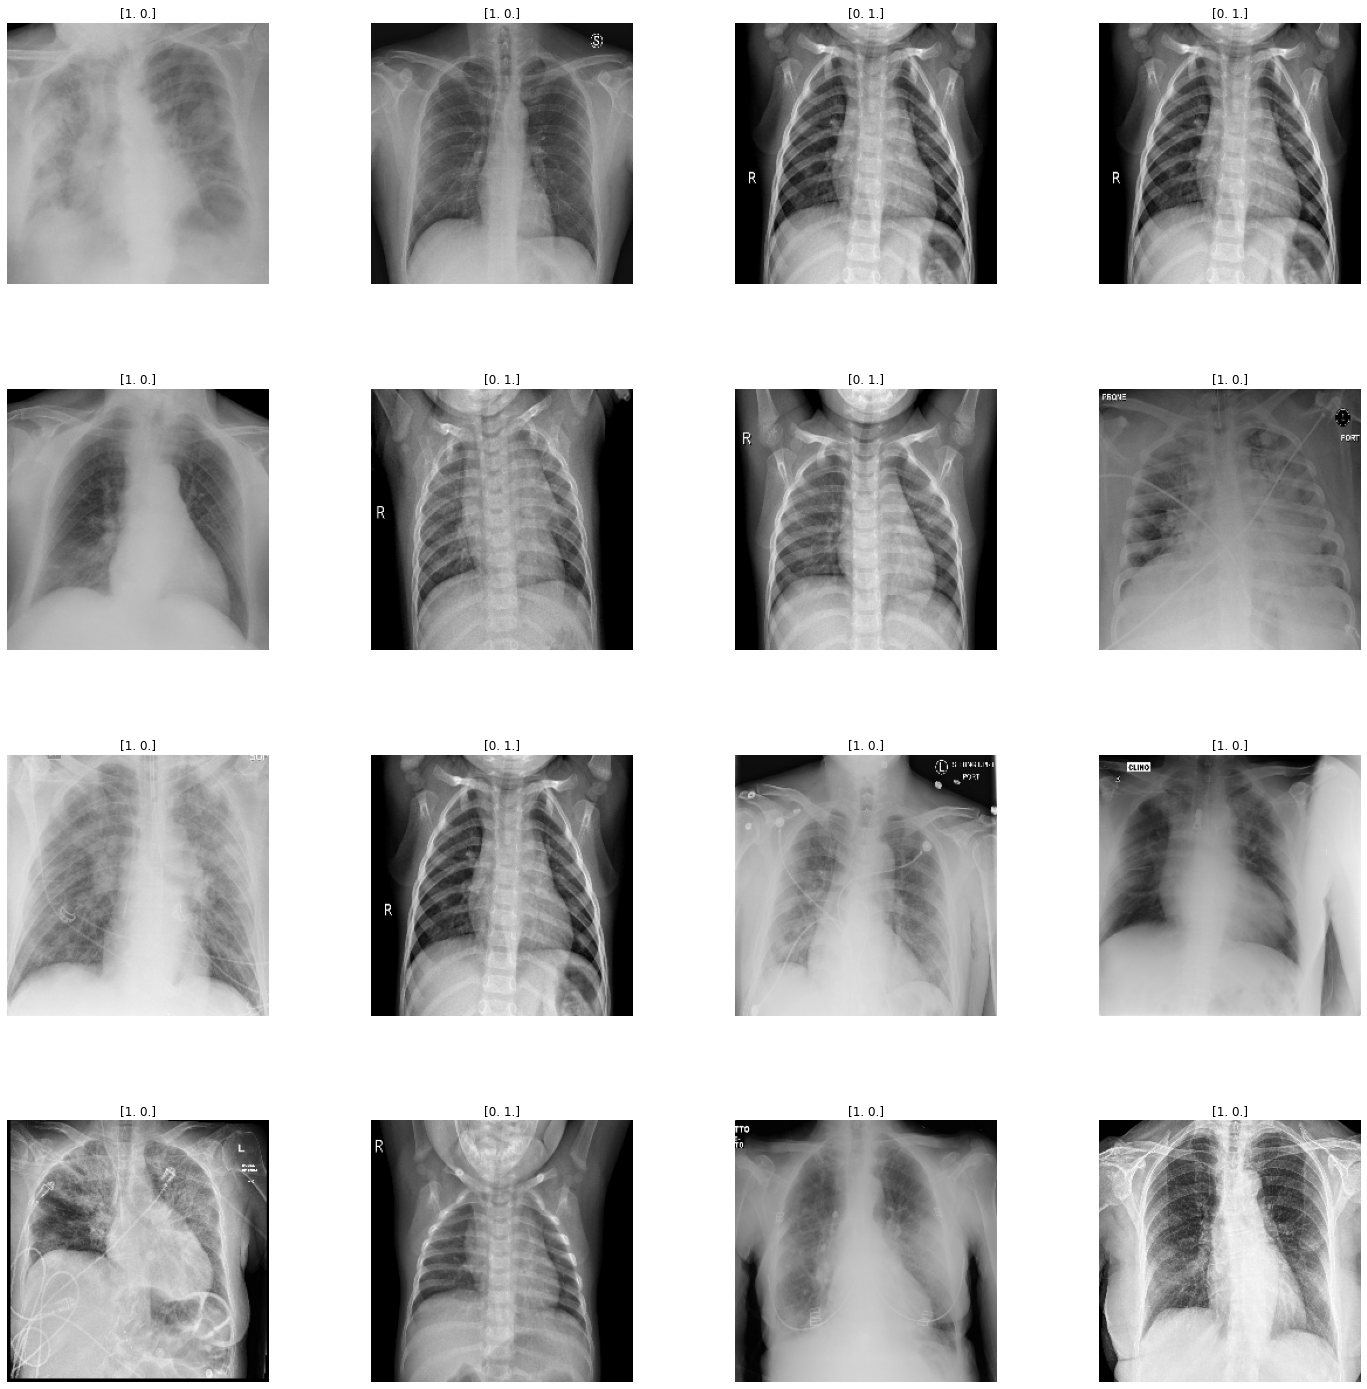

In [20]:


W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)



In [21]:
opt = Adam(lr=learning_rate, decay=learning_rate / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // batch_size,
    epochs=epochs)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
20/20 [==============================] - 3s 172ms/step - loss: 0.7136 - accuracy: 0.5938 - val_loss: 0.5129 - val_accuracy: 0.9500
Epoch 2/50
20/20 [==============================] - 3s 156ms/step - loss: 0.4924 - accuracy: 0.7437 - val_loss: 0.4193 - val_accuracy: 0.9500
Epoch 3/50
20/20 [==============================] - 3s 156ms/step - loss: 0.3821 - accuracy: 0.8625 - val_loss: 0.3016 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 3s 155ms/step - loss: 0.2924 - accuracy: 0.9375 - val_loss: 0.2329 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 3s 157ms/step - loss: 0.2266 - accuracy: 0.9563 - val_loss: 0.1830 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 3s 156ms/step - loss: 0.2372 - accuracy: 0.9375 - val_loss: 0.1607 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 3s 

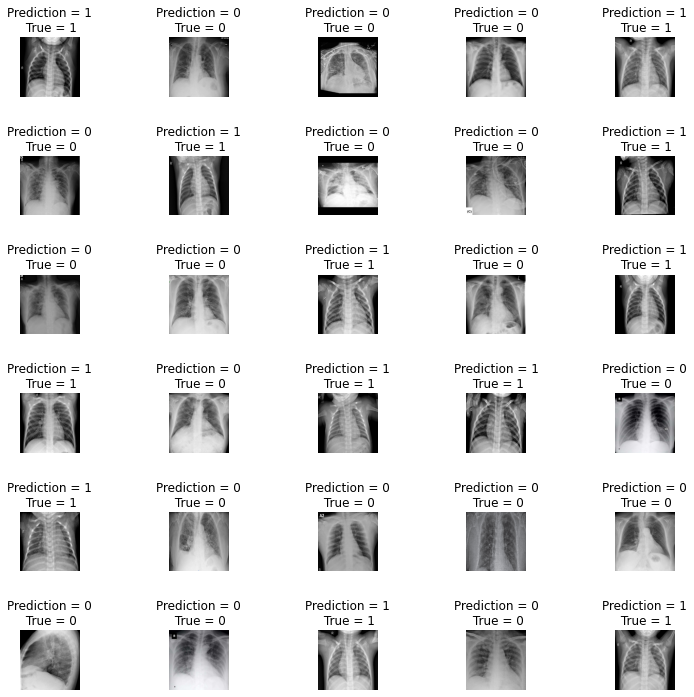

In [22]:


L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=batch_size)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)



In [23]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=batch_size)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))


              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


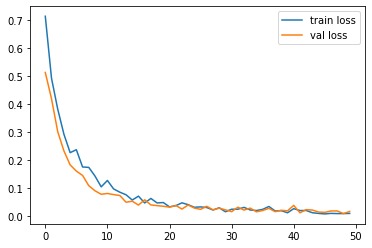

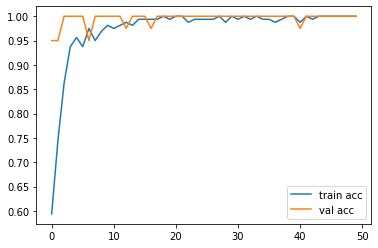

In [26]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
model.save('Covid_model.h5')

Using TensorFlow backend.


Prediction: Normal


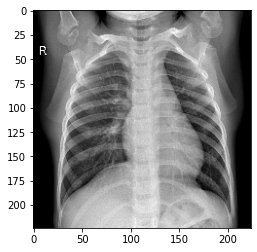

In [28]:


import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/My Drive/XRAY/Data/Normal/IM-0166-0001.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')



Prediction: Normal


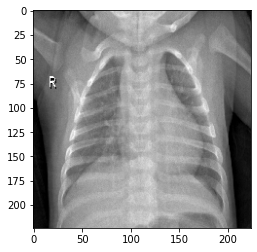

In [29]:


img = image.load_img('/content/drive/My Drive/XRAY/Data/Normal/IM-0164-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

